### Will a Customer Accept the Coupon?

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

### Data Description


The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
# Import warnings library and seting filterwarning to false to prevent alerts from seaborn library
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import matplotlib, seaborn, pandas and numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
# Load the data
data = pd.read_csv('data/coupons.csv')

# Dataframe shape
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns')

The dataset has 12684 rows and 26 columns


In [6]:
# Sample 5 rows of data
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2572,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,50plus,Married partner,...,less1,gt8,4~8,less1,1,1,0,0,1,0
5424,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,26,Single,...,NaN,1~3,1~3,less1,1,1,1,0,1,0
9455,Home,Alone,Rainy,55,6PM,Bar,1d,Male,50plus,Unmarried partner,...,less1,4~8,1~3,less1,1,1,1,0,1,1
7260,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Male,50plus,Married partner,...,1~3,gt8,4~8,less1,1,0,0,1,0,1
4025,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,1d,Male,31,Married partner,...,4~8,1~3,gt8,gt8,1,0,0,0,1,1


##### Investigation of the dataset for missing or problematic data.

In [8]:
# Get general information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Percentage of Car rows that are missing data 99.14853358561967%
Percentage of Bar rows that are missing data 0.8435824660990224%
Percentage of CoffeeHouse rows that are missing data 1.7108167770419427%
Percentage of CarryAway rows that are missing data 1.1904761904761905%
Percentage of RestaurantLessThan20 rows that are missing data 1.0249132765689057%
Percentage of Restaurant20To50 rows that are missing data 1.490066225165563%


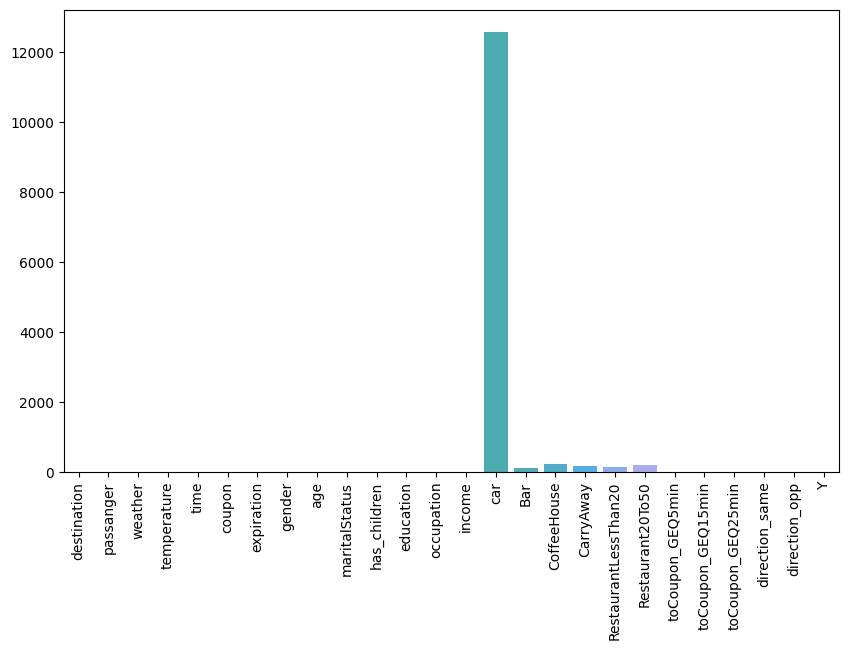

In [11]:
# Count null values
missing_values_count = data.isnull().sum()

# Bar plot of missing data by column
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values)
plt.xticks(rotation=90)

print(f"Percentage of Car rows that are missing data {data['car'].isnull().sum()/data.shape[0]*100}%")
print(f"Percentage of Bar rows that are missing data {data['Bar'].isnull().sum()/data.shape[0]*100}%")
print(f"Percentage of CoffeeHouse rows that are missing data {data['CoffeeHouse'].isnull().sum()/data.shape[0]*100}%")
print(f"Percentage of CarryAway rows that are missing data {data['CarryAway'].isnull().sum()/data.shape[0]*100}%")
print(f"Percentage of RestaurantLessThan20 rows that are missing data {data['RestaurantLessThan20'].isnull().sum()/data.shape[0]*100}%")
print(f"Percentage of Restaurant20To50 rows that are missing data {data['Restaurant20To50'].isnull().sum()/data.shape[0]*100}%")

##### Car is the column with most null values: 12576 of 12684 entries (99.14%)
**Considering that more than 99% of the rows have null values in the Car column, this column will be removed from the dataset as it will not add much to the analysis.**

In [12]:
# Drop the car column
data.drop('car',axis=1, inplace=True)

#### Proportion of the total observations chose to accept the coupon



In [13]:
# Proportion of the total observations chose to accept the coupon (in %)
data['Y'].value_counts(normalize=True)[1]*100

56.84326710816777

Text(0, 0.5, 'Count')

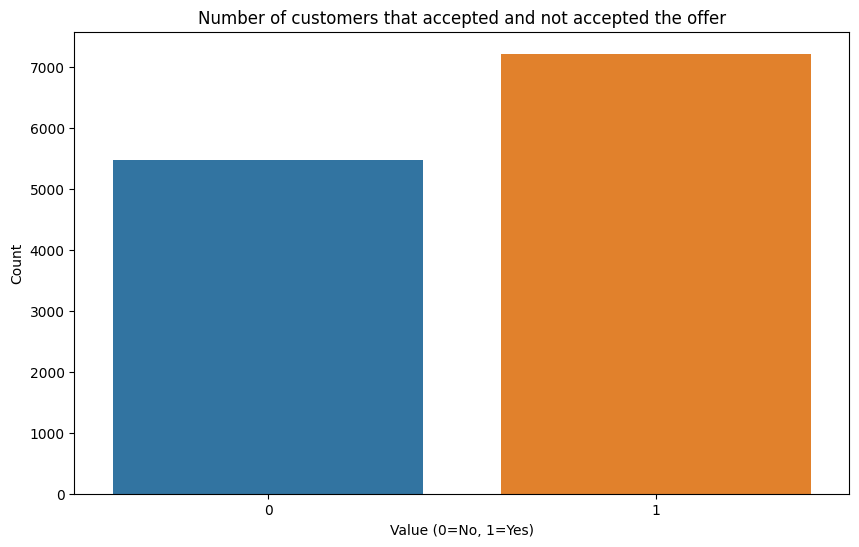

In [22]:
# Plot number of observations that accepted and not accepted
plt.figure(figsize=(10, 6))
sns.countplot(data,x='Y')

# Set labels and title
plt.title('Number of customers that accepted and not accepted the offer')
plt.xlabel('Value (0=No, 1=Yes)')
plt.ylabel('Count')

### Relationship between Coupon type and Acceptance Rate
Does the coupon type have any effect on increasing or reducing the number of people who accepted the coupon?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

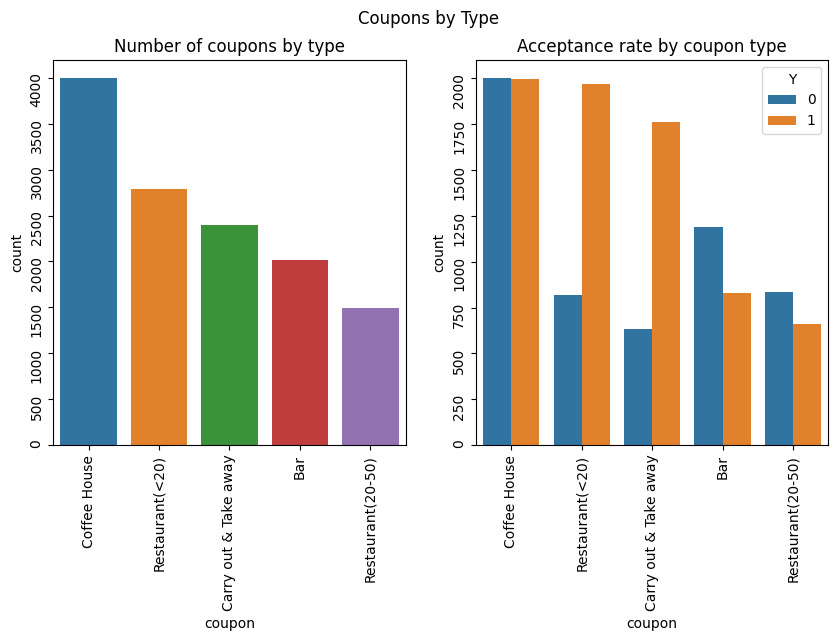

In [32]:
# Plot number of observations by coupon
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
fig.suptitle('Coupons by Type')

sns.countplot(ax = ax[0], data=data,x='coupon', order = data['coupon'].value_counts().index)
ax[0].set_title('Number of coupons by type')
ax[0].tick_params(labelrotation=90)

sns.countplot(ax = ax[1], data=data,x='coupon',hue='Y', order = data['coupon'].value_counts().index)
ax[1].set_title('Acceptance rate by coupon type')
ax[1].tick_params(labelrotation=90)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

In [37]:
# Group dataframe by Coupon and count the number of observations for each coupon type
df_grouped_coupon = data.groupby('coupon')['Y'].agg({'count','sum'}).reset_index()
# Calculate the conversion rate (count of coupons / count of customer who accepted)
df_grouped_coupon['acceptance_rate'] = df_grouped_coupon['sum']/df_grouped_coupon['count']*100
# Sort dataframe by number of cupons per weather
df_grouped_coupon.sort_values('acceptance_rate',ascending=False, inplace=True)

df_grouped_coupon


,coupon,count,sum,acceptance_rate
1,Carry out & Take away,2393,1760,73.547848
4,Restaurant(<20),2786,1970,70.710696
2,Coffee House,3996,1995,49.924925
3,Restaurant(20-50),1492,658,44.101877
0,Bar,2017,827,41.001487


The acceptance rate for coupon types Carry out & Take away and Restaurant(<20) are higher than the overall average (56.84%), both greater than 70%.
The acceptance rate for coupon types Coffee House, Restaurant(20-50) ana Bar are lower than the overall average (56.84%), all lower than 50%.


### Visualizing the temperature column

temperature
80    0.514664
55    0.302744
30    0.182592
Name: proportion, dtype: float64

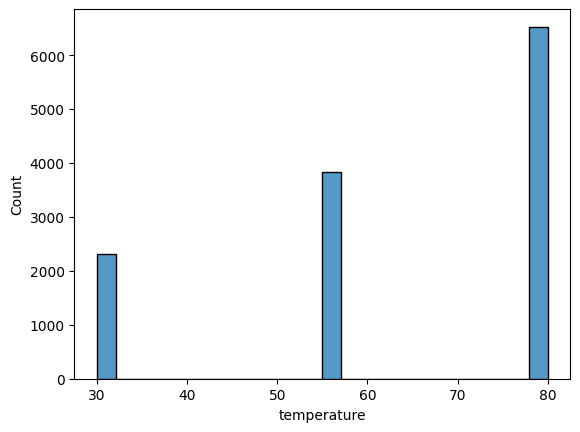

In [38]:
# Histogram plot of temperature column
sns.histplot(data,x='temperature')
data['temperature'].value_counts(normalize=True)

In [39]:
print('The dataset has only three possible temperatures (80, 55, 30).')
print(f'80: {len(data.query("temperature == 80"))/len(data["temperature"])*100}% of total obsevations')
print(f'55: {len(data.query("temperature == 55"))/len(data["temperature"])*100}% of total obsevations')
print(f'30: {len(data.query("temperature == 30"))/len(data["temperature"])*100}% of total obsevations')


The dataset has only three possible temperatures (80, 55, 30).
80: 51.466414380321666% of total obsevations
55: 30.274361400189214% of total obsevations
30: 18.25922421948912% of total obsevations


Text(0, 0.5, 'Count')

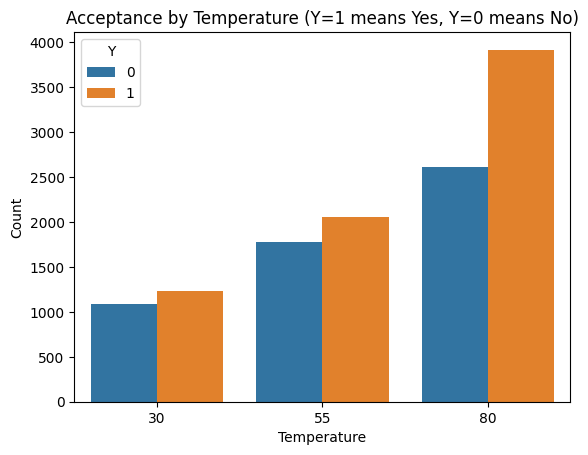

In [48]:
# Plot number of observations by temperature
fig = plt.plot(figsize=(10, 5))
plt.title('A')

sns.countplot(data=data,x='temperature',hue='Y')

# Set labels and title
plt.title('Acceptance by Temperature (Y=1 means Yes, Y=0 means No)')
plt.xlabel('Temperature')
plt.ylabel('Count')


In [49]:
# Group dataframe by Temperature and count the number of observations for each temperature
df_grouped_temperature = data.groupby('temperature')['Y'].agg({'count','sum'}).reset_index()
# Calculate the conversion rate (count of coupons / count of customer who accepted)
df_grouped_temperature['acceptance_rate'] = df_grouped_temperature['sum']/df_grouped_temperature['count']*100
# Sort dataframe by number of cupons per weather
df_grouped_temperature.sort_values('acceptance_rate',ascending=False, inplace=True)

df_grouped_temperature

,temperature,count,sum,acceptance_rate
2,80,6528,3919,60.033701
1,55,3840,2061,53.671875
0,30,2316,1230,53.108808


Apparently temperature is not an extremely important factor in coupon acceptance. Perhaps because we have few temperature measurements (only three).

### Investigating the Bar Coupons

Let's explore just the bar related coupons.  


In [50]:
# New `DataFrame` that contains just the bar coupons
data_bar = data.copy().query('coupon == "Bar"')
data_bar.shape

(2017, 25)

In [51]:
# Proportion of bar coupons were accepted
data_bar['Y'].value_counts(normalize=True)

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

In [53]:
print(f'The proportion of bar coupons that were accepted is {data_bar["Y"].value_counts(normalize=True)[1]*100}%')

The proportion of bar coupons that were accepted is 41.00148735746158%


##### Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [78]:
# Acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
frequency_3_or_less = ['less1', '1~3']
df_frequency_3_or_less = data_bar.copy()
df_frequency_3_or_less['bar_frequency'] = df_frequency_3_or_less['Bar'].apply(lambda x: '3 or Less' if x in (frequency_3_or_less) else 'More than 3')

# Count of values
print('Count of values')
print(df_frequency_3_or_less['bar_frequency'].value_counts())

# Proportion
print('\nProportion')
print(df_frequency_3_or_less['bar_frequency'].value_counts(normalize=True))

Count of values
bar_frequency
More than 3    1050
3 or Less       967
Name: count, dtype: int64

Proportion
bar_frequency
More than 3    0.520575
3 or Less      0.479425
Name: proportion, dtype: float64


In [79]:
# Acceptance rate
# 3 or less
print('3 or less')
print(df_frequency_3_or_less.query('bar_frequency == "3 or Less"')['Y'].value_counts(normalize = True))

# More than 3
print('\nMore than 3')
print(df_frequency_3_or_less.query('bar_frequency == "More than 3"')['Y'].value_counts(normalize = True))

3 or less
Y
1    0.527404
0    0.472596
Name: proportion, dtype: float64

More than 3
Y
0    0.698095
1    0.301905
Name: proportion, dtype: float64


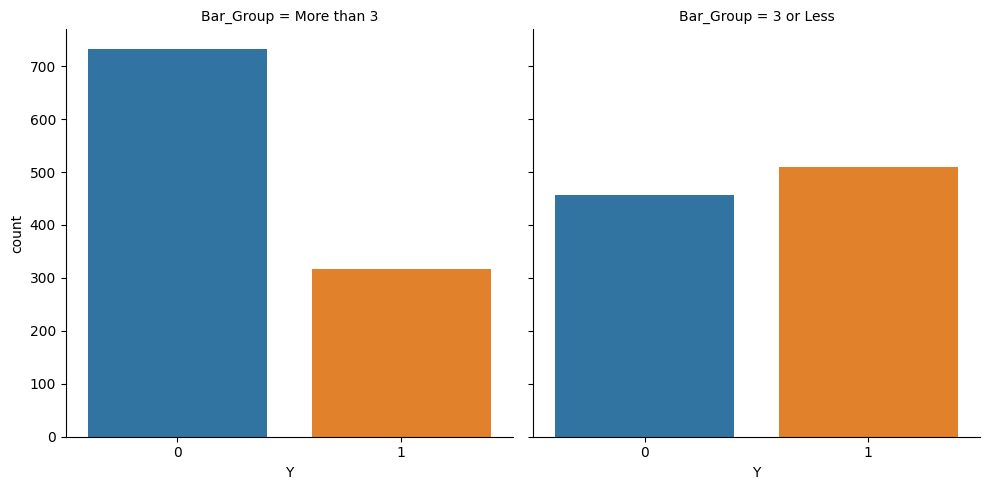

In [80]:
# Plot the two groups
sns.catplot(x='Y', col='Bar_Group', data=df_frequency_3_or_less, kind='count')

##### Based on the data, let's analyze if people who go to the bar 3 times or less are more likely to accept the coupon than people who go to the bar more than 3 times.

##### Comparisson of acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.

In [75]:
more_than_once = ['1~3','4~8','gt8']
age_below_25 = ['below21','21']

# Copy the data bar dataframe
df_gt1_gt25 = data_bar.copy()

# Create a new column to classify people who are below 25 years and go to a bar more than once
df_gt1_gt25['gt1_age_gt25'] = df_gt1_gt25.apply(lambda x: True if (x['Bar'] in (more_than_once)) and (x['age'] not in (age_below_25)) else False, axis=1)

In [77]:
# Acceptance rate
# More than once and Below 25
print('More than once and Below 25')
print(df_gt1_gt25.query('gt1_age_gt25 == True')['Y'].value_counts(normalize = True))

# All Others
print('\nAll Others')
print(df_gt1_gt25.query('gt1_age_gt25 != True')['Y'].value_counts(normalize = True))

More than once and Below 25
Y
1    0.695238
0    0.304762
Name: proportion, dtype: float64

All Others
Y
0    0.664997
1    0.335003
Name: proportion, dtype: float64


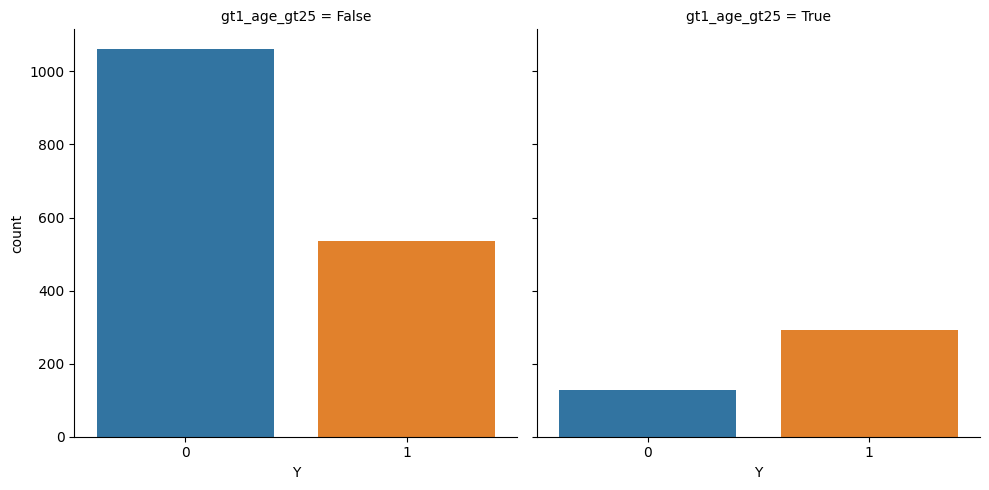

In [28]:
sns.catplot(x='Y', col='gt1_age_gt25', data=data_bar, kind='count')

Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [81]:
more_than_once = ['1~3','4~8','gt8']

# Copy the data bar dataframe
df_gt1_nkid_ex_oc = data_bar.copy()

# Create a new column to classify people who go to a bar more than once, pasagengers were not a kid and had occupations other than arming, fishing, or forestry.
df_gt1_nkid_ex_oc['gt1_nkid_ex_oc'] = df_gt1_nkid_ex_oc.apply(lambda x: True if (x['Bar'] in (more_than_once)) and (x['passanger'] != 'Kid(s)') and (x['occupation'] != 'Farming Fishing & Forestry') else False, axis=1)

In [83]:
# Acceptance rate
# More than once, passanger not kid and occupations other than farming, fishing, or forestry.
print('More than once, passanger not kid and occupations other than farming, fishing, or forestry.')
print(df_gt1_nkid_ex_oc.query('gt1_nkid_ex_oc == True')['Y'].value_counts(normalize = True))

# All Others
print('\nAll Others')
print(df_gt1_nkid_ex_oc.query('gt1_nkid_ex_oc != True')['Y'].value_counts(normalize = True))

More than once, passanger not kid and occupations other than farming, fishing, or forestry.
Y
1    0.713249
0    0.286751
Name: proportion, dtype: float64

All Others
Y
0    0.703956
1    0.296044
Name: proportion, dtype: float64


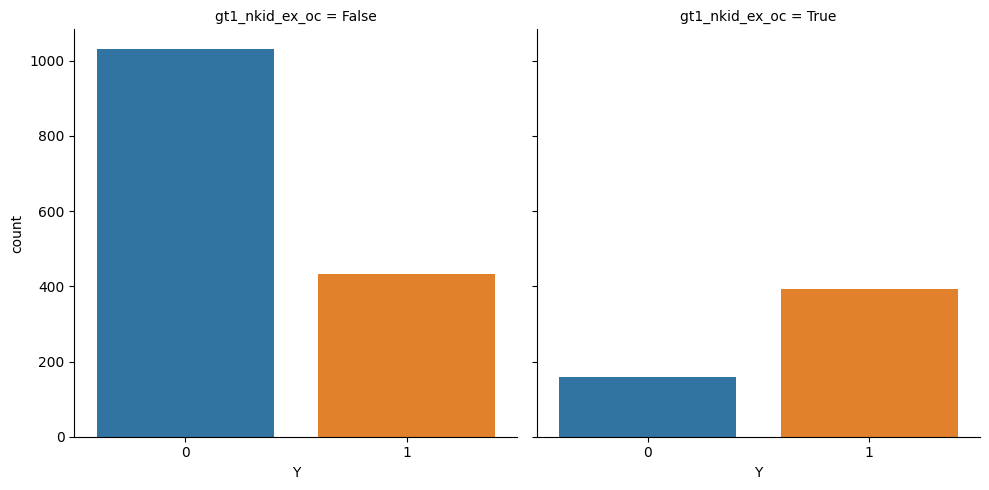

In [30]:
sns.catplot(data=df_gt1_nkid_ex_oc, x='Y', col='gt1_nkid_ex_oc',kind='count')

##### Comparint the acceptance rates between those drivers who:
- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Go to bars more than once a month, had passengers that were not a kid, and were not widowed
Y
1    0.717949
0    0.282051
Name: proportion, dtype: float64

All Others
Y
0    0.622942
1    0.377058
Name: proportion, dtype: float64


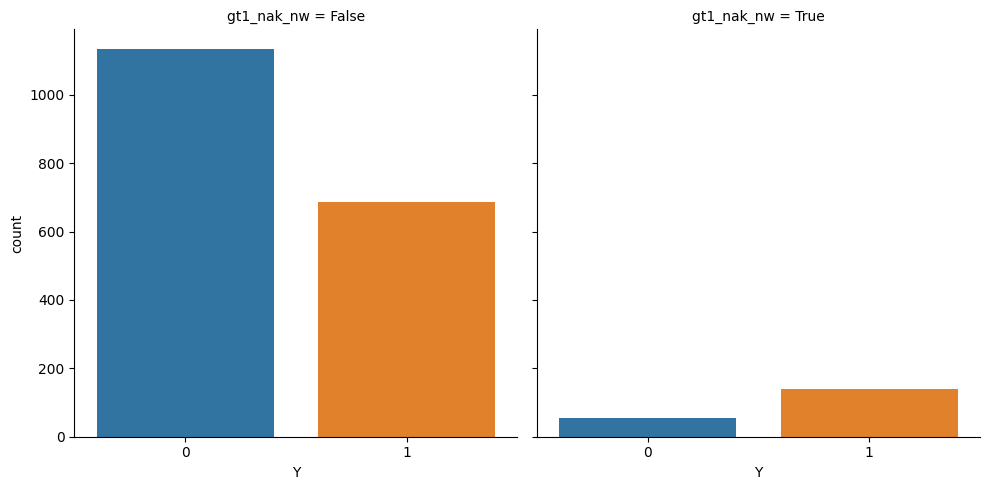

In [102]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
more_than_once = ['1~3','4~8','gt8']
alone_kids = ['Alone','Kid(s)']
widowed = ['Widowed']
data_bar['gt1_nak_nw'] = data_bar.apply(lambda x: True if (x['Bar'] in (more_than_once)) and
                                        (x['passanger'] not in (alone_kids)) and
                                        (x['maritalStatus'] not in (widowed)) else False, axis=1)

print('Go to bars more than once a month, had passengers that were not a kid, and were not widowed')
print(data_bar.query('gt1_nak_nw == True')['Y'].value_counts(normalize = True))

# All Others
print('\nAll Others')
print(data_bar.query('gt1_nak_nw != True')['Y'].value_counts(normalize = True))

# Create a plot for each category
sns.catplot(data=data_bar, x='Y', col='gt1_nak_nw',kind='count')

go to bars more than once a month and are under the age of 30
Y
1    0.717949
0    0.282051
Name: proportion, dtype: float64

All Others
Y
0    0.622942
1    0.377058
Name: proportion, dtype: float64


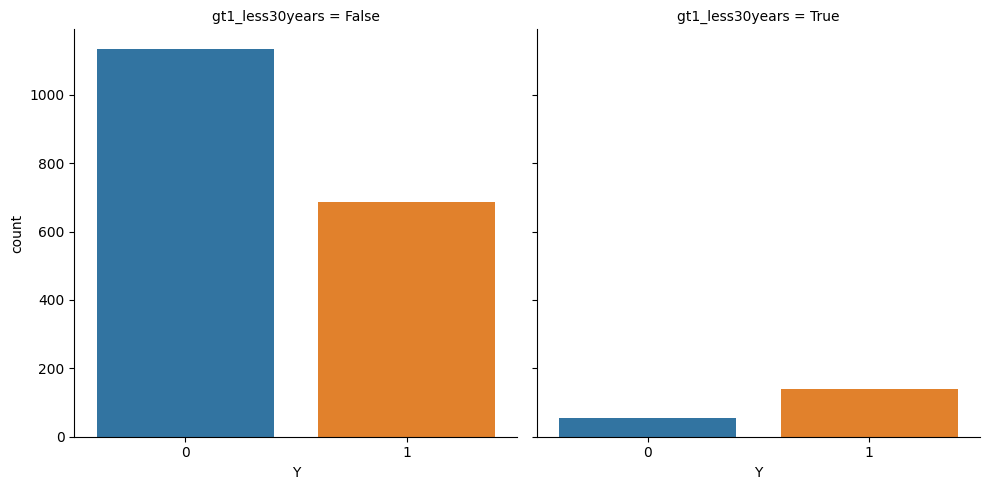

In [104]:
# go to bars more than once a month and are under the age of 30
more_than_once = ['1~3','4~8','gt8']
age_under_30 = ['below21','21','26']
data_bar['gt1_less30years'] = data_bar.apply(lambda x: True if (x['Bar'] in (more_than_once)) and
                                        (x['passanger'] not in (alone_kids)) and
                                        (x['maritalStatus'] not in (widowed)) else False, axis=1)

print('go to bars more than once a month and are under the age of 30')
print(data_bar.query('gt1_less30years == True')['Y'].value_counts(normalize = True))

# All Others
print('\nAll Others')
print(data_bar.query('gt1_less30years != True')['Y'].value_counts(normalize = True))

# Create a plot for each category
sns.catplot(data=data_bar, x='Y', col='gt1_less30years',kind='count')

go to cheap restaurants more than 4 times a month and income is less than 50K.
Y
0    0.546512
1    0.453488
Name: proportion, dtype: float64

All Others
Y
0    0.598924
1    0.401076
Name: proportion, dtype: float64


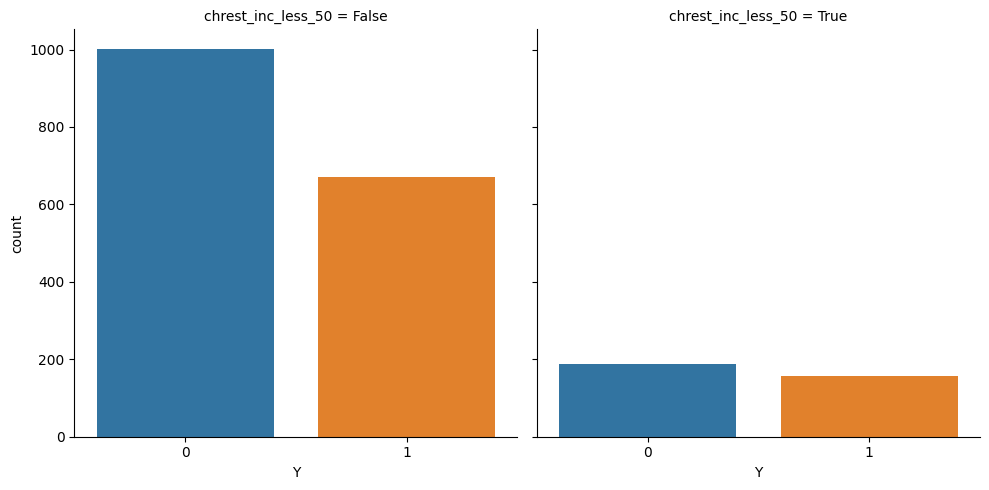

In [106]:
# go to cheap restaurants more than 4 times a month and income is less than 50K.
income_less_50 = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']
cheap_restaurant = ['4~8','gt8']
data_bar['chrest_inc_less_50'] = data_bar.apply(lambda x: True if (x['income'] in (income_less_50)) and
                                        (x['RestaurantLessThan20'] in (cheap_restaurant)) 
                                        else False, axis=1)

print('go to cheap restaurants more than 4 times a month and income is less than 50K.')
print(data_bar.query('chrest_inc_less_50 == True')['Y'].value_counts(normalize = True))

# All Others
print('\nAll Others')
print(data_bar.query('chrest_inc_less_50 != True')['Y'].value_counts(normalize = True))

# Create a plot for each category
sns.catplot(data=data_bar, x='Y', col='chrest_inc_less_50',kind='count')

Based on these observations, I hypothesize that drivers who accepted the bar coupons are driver who:

- Go to bar more than once and are below 25 years old (Acceptance rate: 69.52%)
- Go to bar more than once and passanger not kid and occupations other than farming, fishing, or forestry. (Acceptance rate: 71.32%)
- Go to bars more than once a month, had passengers that were not a kid and were not widowed (71.79%)
- Go to bars more than once a month and are under the age of 30 (Acceptance rate: 71.79%)

### Relationship between Weather and Acceptance Rate
Does the weather have any effect on increasing or reducing the number of people who accepted the coupon?

In [107]:
# Group dataframe by Weather and count the number of rows for each weather and sum of customer who accepted the cupom
data_grouped_weather = data.groupby('weather')['Y'].agg(['count','sum']).reset_index()
# Calculate the conversion rate (count of offers / count of acceptance)
data_grouped_weather['acceptance_rate'] = data_grouped_weather['sum'] / data_grouped_weather['count'] * 100
# Sort dataframe by number of cupons per weather
data_grouped_weather.sort_values('count', ascending=False, inplace=True)

data_grouped_weather

,weather,count,sum,acceptance_rate
2,Sunny,10069,5989,59.479591
1,Snowy,1405,661,47.046263
0,Rainy,1210,560,46.280992


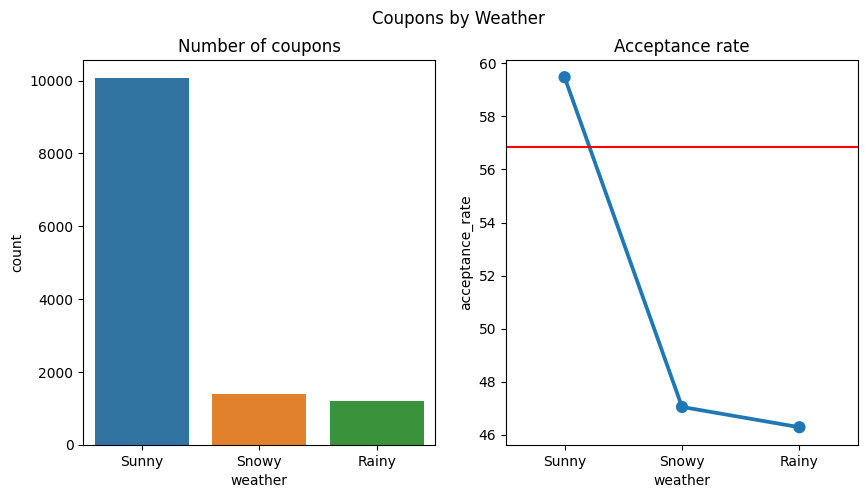

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
fig.suptitle('Coupons by Weather')

sns.barplot(ax = ax[0], data=data_grouped_weather, x='weather',y='count', errwidth=0)
ax[0].set_title('Number of coupons')

sns.pointplot(ax = ax[1], data=data_grouped_weather, x='weather',y='acceptance_rate')
ax[1].set_title('Acceptance rate')

# Horizontal line with average acceptance rate
ax[1].axhline(56.84, color='red')



Taking into account the overall acceptance rate of 56.84%, it seems that weather conditions play a role in influencing acceptance rates. Specifically, on sunny days, the acceptance rate sees a slight improvement at 59%, whereas during snowy and rainy weather, the acceptance rates dip to 47% and 46%, respectively.

In [125]:
# Group dataframe by Weather and count the number of rows for each weather and sum of customer who accepted the cupom
data_grouped_weather_coupon = data.groupby(['weather','coupon'])['Y'].agg(['count','sum']).reset_index()
# Calculate the conversion rate (count of offers / count of acceptance)
data_grouped_weather_coupon['acceptance_rate'] = data_grouped_weather_coupon['sum'] / data_grouped_weather_coupon['count'] * 100
# Concatenate weather and coupon
data_grouped_weather_coupon['weather_coupon'] = data_grouped_weather_coupon['weather'] + ' - ' + data_grouped_weather_coupon['coupon']

# Sort dataframe by number of cupons per weather
data_grouped_weather_coupon.sort_values('acceptance_rate', ascending=False, inplace=True)

data_grouped_weather_coupon

,weather,coupon,count,sum,acceptance_rate,weather_coupon
14,Sunny,Restaurant(<20),2240,1721,76.830357,Sunny - Restaurant(<20)
11,Sunny,Carry out & Take away,1767,1348,76.287493,Sunny - Carry out & Take away
6,Snowy,Carry out & Take away,307,217,70.684039,Snowy - Carry out & Take away
1,Rainy,Carry out & Take away,319,195,61.128527,Rainy - Carry out & Take away
2,Rainy,Coffee House,226,118,52.212389,Rainy - Coffee House
12,Sunny,Coffee House,3467,1746,50.360542,Sunny - Coffee House
9,Snowy,Restaurant(<20),376,183,48.670213,Snowy - Restaurant(<20)
13,Sunny,Restaurant(20-50),1247,579,46.431435,Sunny - Restaurant(20-50)
10,Sunny,Bar,1348,595,44.139466,Sunny - Bar
7,Snowy,Coffee House,303,131,43.234323,Snowy - Coffee House


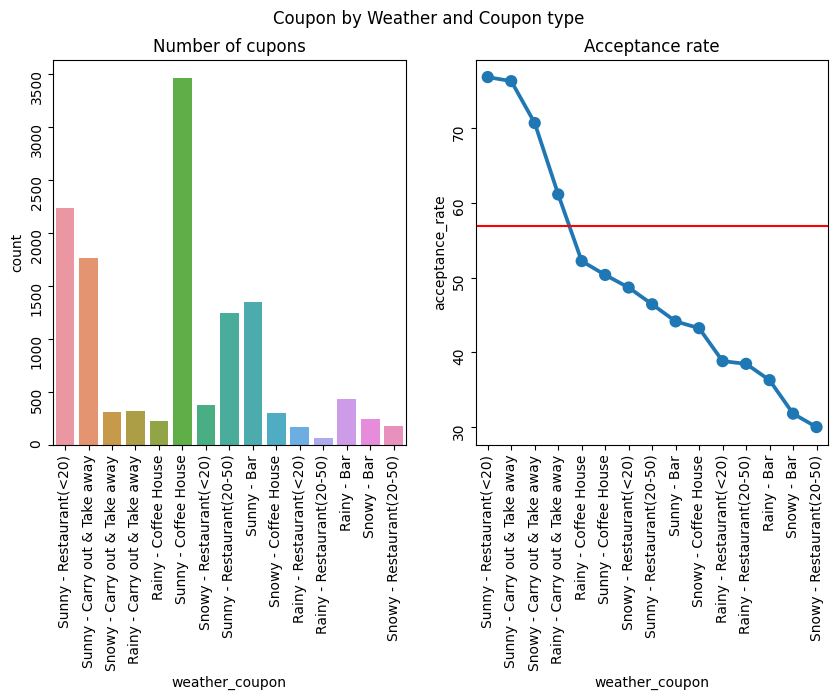

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
fig.suptitle('Coupon by Weather and Coupon type')

sns.barplot(ax = ax[0], data=data_grouped_weather_coupon, x='weather_coupon',y='count', errwidth=0)
ax[0].set_title('Number of cupons')
ax[0].tick_params(labelrotation=90)

sns.pointplot(ax = ax[1], data=data_grouped_weather_coupon, x='weather_coupon',y='acceptance_rate')
ax[1].set_title('Acceptance rate')
ax[1].tick_params(labelrotation=90)

# Horizontal line with average acceptance rate
ax[1].axhline(56.84, color='red')


In [103]:
# Filter all combinations of Weather and Coupons that the acceptance rate is greater than the overall average (56.84%)
data_grouped_weather_coupon.query('acceptance_rate > 56.84').sort_values('acceptance_rate',ascending=False)

,weather,coupon,count,sum,acceptance_rate,weather_coupon
14,Sunny,Restaurant(<20),2240,1721,76.830357,Sunny - Restaurant(<20)
11,Sunny,Carry out & Take away,1767,1348,76.287493,Sunny - Carry out & Take away
6,Snowy,Carry out & Take away,307,217,70.684039,Snowy - Carry out & Take away
1,Rainy,Carry out & Take away,319,195,61.128527,Rainy - Carry out & Take away


In [104]:
# Filter all combinations of Weather and Coupons that the acceptance rate is lower than the overall average (56.84%)
data_grouped_weather_coupon.query('acceptance_rate < 56.84').sort_values('acceptance_rate')

,weather,coupon,count,sum,acceptance_rate,weather_coupon
8,Snowy,Restaurant(20-50),180,54,30.000000,Snowy - Restaurant(20-50)
5,Snowy,Bar,239,76,31.799163,Snowy - Bar
0,Rainy,Bar,430,156,36.279070,Rainy - Bar
3,Rainy,Restaurant(20-50),65,25,38.461538,Rainy - Restaurant(20-50)
4,Rainy,Restaurant(<20),170,66,38.823529,Rainy - Restaurant(<20)
7,Snowy,Coffee House,303,131,43.234323,Snowy - Coffee House
10,Sunny,Bar,1348,595,44.139466,Sunny - Bar
13,Sunny,Restaurant(20-50),1247,579,46.431435,Sunny - Restaurant(20-50)
9,Snowy,Restaurant(<20),376,183,48.670213,Snowy - Restaurant(<20)
12,Sunny,Coffee House,3467,1746,50.360542,Sunny - Coffee House


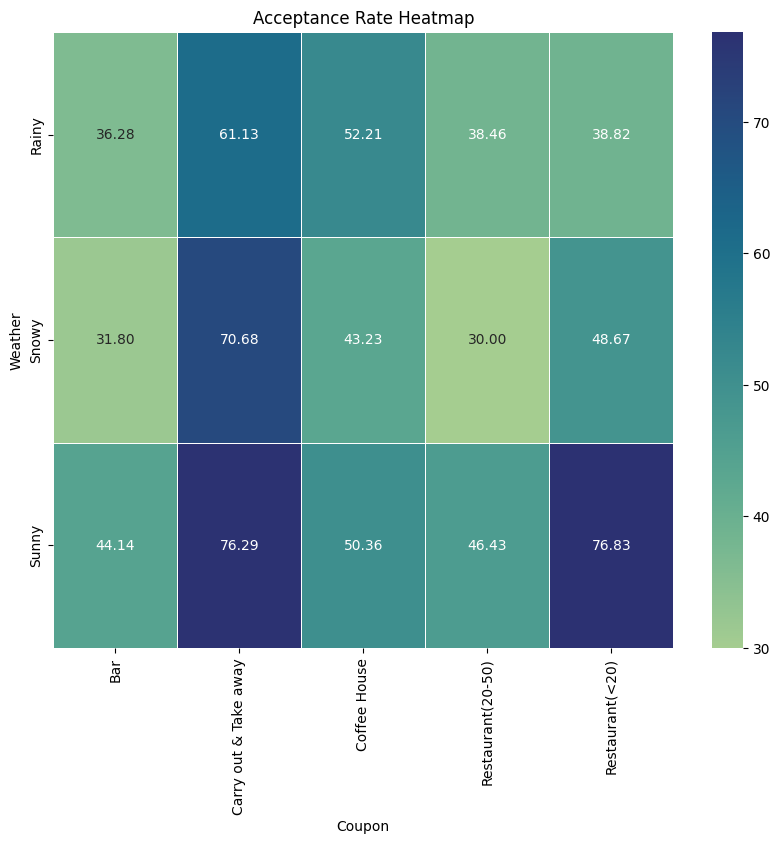

In [138]:
# Plot Acceptance Rate Heatmap - Coupon by Weather
plt.figure(figsize=(10, 8))
sns.heatmap(data_grouped_weather_coupon.pivot(index="weather", columns="coupon", values="acceptance_rate"),
            annot=True, linewidths=0.5, fmt=".2f", cmap="crest")


# Add labels and title
plt.xlabel('Coupon')
plt.ylabel('Weather')
plt.title('Acceptance Rate Heatmap')

# Show the plot
plt.show()

<Axes: xlabel='acceptance_rate', ylabel='weather'>

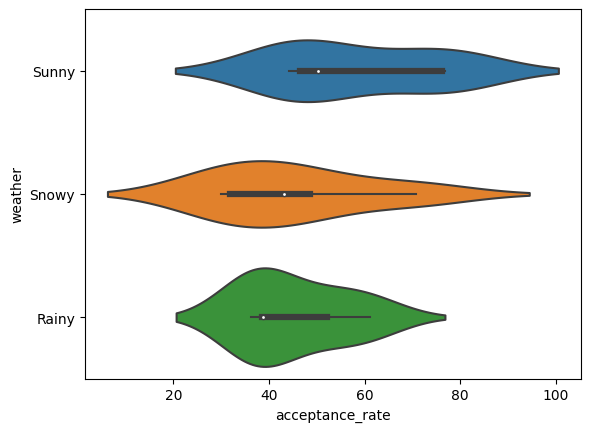

In [147]:
# Violin Plot of Acceptance Rate by Weather
sns.violinplot(data=data_grouped_weather_coupon,x='acceptance_rate', y='weather')

**The observations suggest that weather conditions do indeed influence the acceptance rates of different coupons:**

##### High Acceptance Rates (Between 60% and 80%):

- "Sunny - Restaurant(<20)" and "Sunny - Carry out & Take away" both exhibit high acceptance rates, with values exceeding 76%.
- "Snowy - Carry out & Take away" also shows a relatively high acceptance rate at approximately 70.68%.
- "Rainy - Carry out & Take away" has a moderate acceptance rate of around 61.13%.

##### Moderate Acceptance Rates (Between 50% and 60%):

- "Sunny - Coffee House" has an acceptance rate of approximately 50.36%, falling into the moderate range.
- "Sunny - Restaurant(20-50)" and "Sunny - Bar" have acceptance rates around 46.43% and 44.14%, respectively, placing them in this category.

##### Low Acceptance Rates (Below 50%):

- "Snowy - Restaurant(<20)" has an acceptance rate below 50% at about 48.67%.
- "Snowy - Coffee House," "Rainy - Restaurant(<20)," and "Rainy - Restaurant(20-50)" all have acceptance rates below 45%, indicating lower performance.
- "Rainy - Coffee House," "Rainy - Bar," "Snowy - Bar," and "Snowy - Restaurant(20-50)" have the lowest acceptance rates, with values below 40%.

In summary, Sunny days generally leading to higher acceptance rates, while rainy and snowy conditions tend to result in lower acceptance rates for most coupon types. These insights can be valuable for marketing and promotion strategies based on weather forecasts.

### Relationship between Destination and Acceptance Rate
Does the destination have any effect on increasing or reducing the number of people who accepted the coupon?

In [110]:
# Group dataframe by Destionation and count the number of rows for each weather and sum of customer who accepted the cupom
data_grouped_destination = data.groupby('destination')['Y'].agg(['count','sum']).reset_index()
# Calculate the conversion rate (count of offers / count of acceptance)
data_grouped_destination['acceptance_rate'] = data_grouped_destination['sum'] / data_grouped_destination['count'] * 100
# Sort dataframe by number of cupons per weather
data_grouped_destination.sort_values('count', ascending=False, inplace=True)

data_grouped_destination

,destination,count,sum,acceptance_rate
1,No Urgent Place,6283,3982,63.377367
0,Home,3237,1639,50.633302
2,Work,3164,1589,50.221239


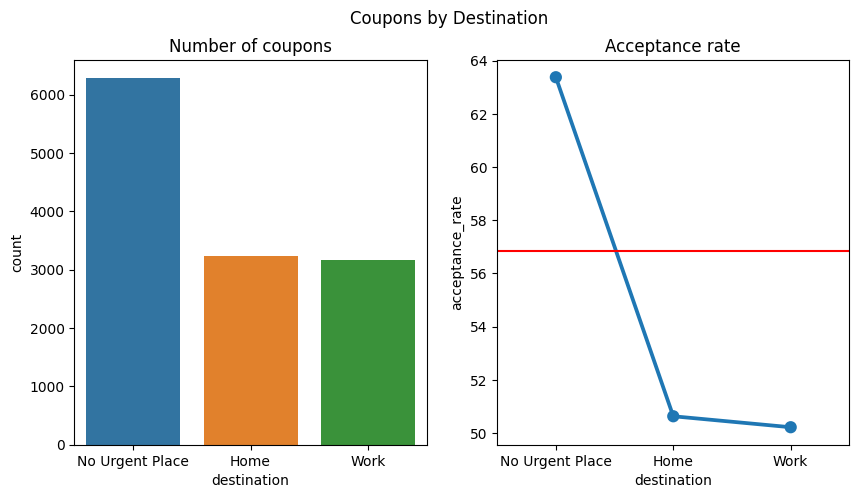

In [123]:
# Plot destination with total number of coupons and acceptance rate
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
fig.suptitle('Coupons by Destination')

sns.barplot(ax = ax[0], data=data_grouped_destination, x='destination',y='count')
ax[0].set_title('Number of coupons')

sns.pointplot(ax = ax[1], data=data_grouped_destination, x='destination',y='acceptance_rate')
ax[1].set_title('Acceptance rate')

# Horizontal line with average acceptance rate
ax[1].axhline(56.84, color='red')

Taking into account the overall acceptance rate of 56.84%, it seems that destination plays a role in influencing acceptance rates. Specifically, people driving to No Urgent Place are more likely to accept the coupon, whereas people driving to Home or Work, the acceptance rates reduce to 50%.

In [117]:
# Group dataframe by Destination and count the number of rows for each weather and sum of customer who accepted the cupom
data_grouped_destination_coupon = data.groupby(['destination','coupon'])['Y'].agg(['count','sum']).reset_index()
# Calculate the conversion rate (count of offers / count of acceptance)
data_grouped_destination_coupon['acceptance_rate'] = data_grouped_destination_coupon['sum'] / data_grouped_destination_coupon['count'] * 100
# Concatenate weather and coupon
data_grouped_destination_coupon['destination_coupon'] = data_grouped_destination_coupon['destination'] + ' - ' + data_grouped_destination_coupon['coupon']

# Sort dataframe by number of cupons per weather
data_grouped_destination_coupon.sort_values('acceptance_rate', ascending=False, inplace=True)

data_grouped_destination_coupon

,destination,coupon,count,sum,acceptance_rate,destination_coupon
9,No Urgent Place,Restaurant(<20),1716,1360,79.254079,No Urgent Place - Restaurant(<20)
1,Home,Carry out & Take away,653,515,78.866769,Home - Carry out & Take away
6,No Urgent Place,Carry out & Take away,978,746,76.278119,No Urgent Place - Carry out & Take away
11,Work,Carry out & Take away,762,499,65.485564,Work - Carry out & Take away
14,Work,Restaurant(<20),573,334,58.289703,Work - Restaurant(<20)
7,No Urgent Place,Coffee House,2155,1252,58.097448,No Urgent Place - Coffee House
4,Home,Restaurant(<20),497,276,55.533199,Home - Restaurant(<20)
8,No Urgent Place,Restaurant(20-50),410,206,50.243902,No Urgent Place - Restaurant(20-50)
0,Home,Bar,506,231,45.652174,Home - Bar
12,Work,Coffee House,913,407,44.578313,Work - Coffee House


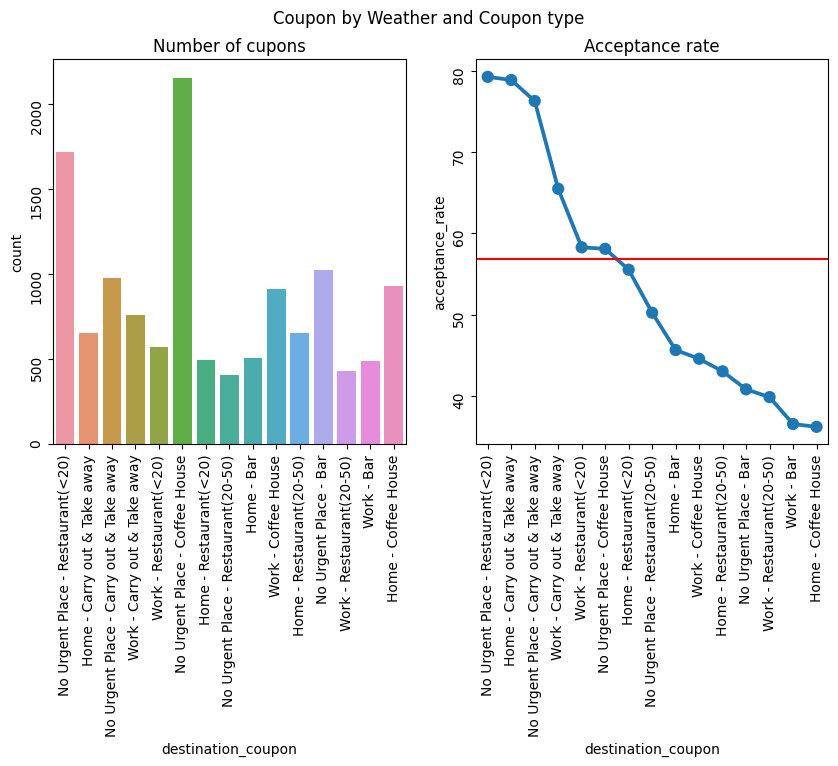

In [121]:
# Plot destination with coupons and acceptance rate

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=False)
fig.suptitle('Coupon by Weather and Coupon type')

sns.barplot(ax = ax[0], data=data_grouped_destination_coupon, x='destination_coupon',y='count', errwidth=0)
ax[0].set_title('Number of cupons')
ax[0].tick_params(labelrotation=90)

sns.pointplot(ax = ax[1], data=data_grouped_destination_coupon, x='destination_coupon',y='acceptance_rate')
ax[1].set_title('Acceptance rate')
ax[1].tick_params(labelrotation=90)

# Horizontal line with average acceptance rate
ax[1].axhline(56.84, color='red')


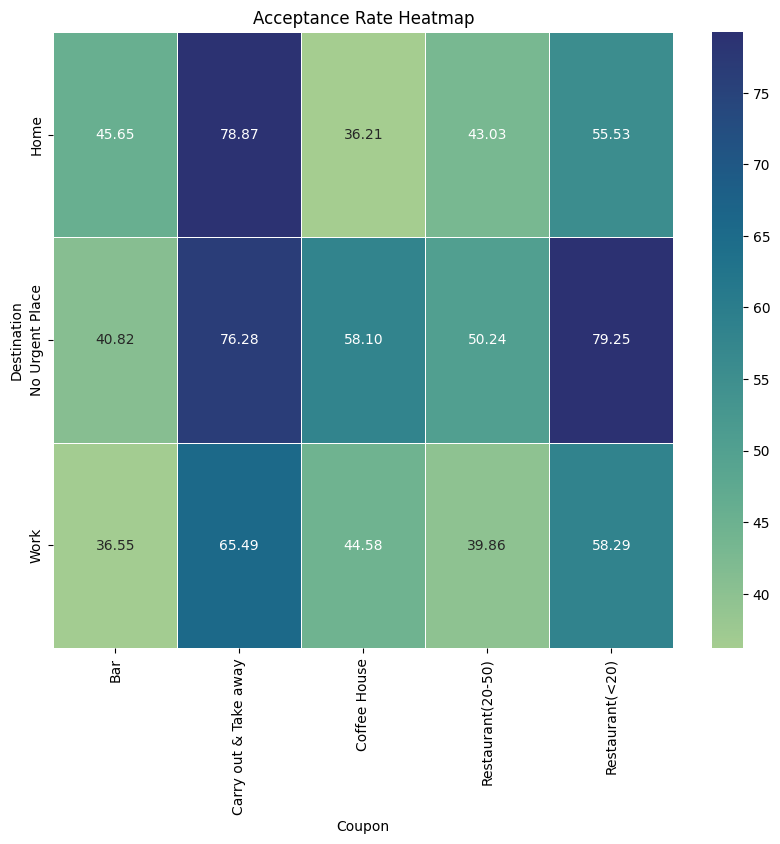

In [139]:
# Plot Acceptance Rate Heatmap - Coupon by Destination
plt.figure(figsize=(10, 8))
sns.heatmap(data_grouped_destination_coupon.pivot(index="destination", columns="coupon", values="acceptance_rate"),
            annot=True, linewidths=0.5, fmt=".2f", cmap="crest")


# Add labels and title
plt.xlabel('Coupon')
plt.ylabel('Destination')
plt.title('Acceptance Rate Heatmap')

# Show the plot
plt.show()

<Axes: xlabel='acceptance_rate', ylabel='destination'>

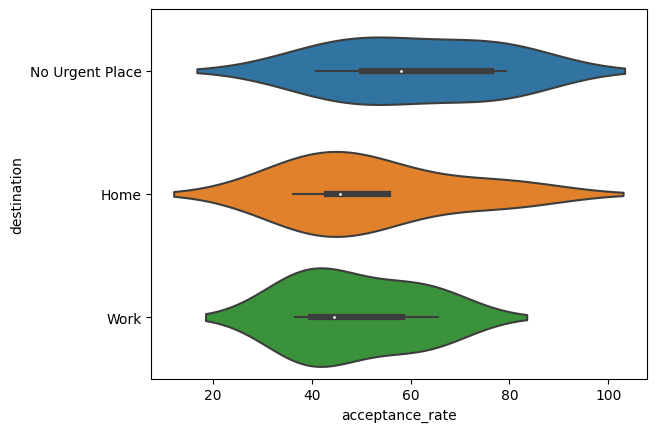

In [150]:
# Violin Plot of Acceptance Rate
sns.violinplot(data=data_grouped_destination_coupon,x='acceptance_rate', y='destination')

**Acceptance rates for different combinations of destinations and coupons shows interesting insights.**

##### High Acceptance Rates:
- "No Urgent Place - Restaurant(<20)" has the highest acceptance rate at approximately 79.25%.
- "Home - Carry out & Take away" also shows a high acceptance rate of nearly 78.87%.
- "No Urgent Place - Carry out & Take away" follows closely with an acceptance rate of about 76.28%.

##### Moderate Acceptance Rates:

- "Work - Carry out & Take away" has a moderate acceptance rate of around 65.49%.
- "Work - Restaurant(<20)" is another combination with a moderate acceptance rate of about 58.29%.
- "No Urgent Place - Coffee House" and "Home - Restaurant(<20)" also fall into this category with acceptance rates around 58.10% and 55.53%, respectively.

##### Lower Acceptance Rates:

- "No Urgent Place - Restaurant(20-50)" has a lower acceptance rate of approximately 50.24%.
- "Home - Bar" and "Work - Coffee House" both have acceptance rates below 46%.
- "Home - Restaurant(20-50)" and "No Urgent Place - Bar" have acceptance rates below 44%.
- "Work - Restaurant(20-50)" and "Work - Bar" have the lowest acceptance rates, below 40%.
- "Home - Coffee House" has an acceptance rate of about 36.21%.

This information can be valuable for decision-making related to marketing and promotions as it highlights which combinations of destinations and coupons are performing well in terms of acceptance rates and which ones may need improvement.

**Going deeper on coupons for Restaurant(<20) and people that were going to No Urgent Place**

In [88]:
# Create a new dataframe and filter Coupon equals to Restaurant(<20) and Destination equals to No Urgent Place
df_no_urgent_place_restaurant_20 = data.query('coupon == "Restaurant(<20)" and destination == "No Urgent Place"')
df_no_urgent_place_restaurant_20

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
10,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
11,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12649,No Urgent Place,Kid(s),Sunny,55,6PM,Restaurant(<20),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,1
12662,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1


In [95]:
# Group dataframe by Occupation and count the number of rows for each occupation and sum of customer who accepted the cupom
df_no_urgent_place_restaurant_20_grouped = df_no_urgent_place_restaurant_20.groupby('occupation')['Y'].agg({'count','sum'}).reset_index()
# Calculate the conversion rate (count of offers / count of acceptance)
df_no_urgent_place_restaurant_20_grouped['acceptance_rate'] = df_no_urgent_place_restaurant_20_grouped['sum'] / df_no_urgent_place_restaurant_20_grouped['count'] * 100

# Sort dataframe by number of cupons per weather
df_no_urgent_place_restaurant_20_grouped.sort_values('acceptance_rate', ascending=False, inplace=True)

df_no_urgent_place_restaurant_20_grouped

,occupation,count,sum,acceptance_rate
6,Construction & Extraction,21,21,100.000000
18,Production Occupations,13,12,92.307692
16,Office & Administrative Support,74,66,89.189189
14,Life Physical Social Science,25,22,88.000000
21,Sales & Related,150,130,86.666667
19,Protective Service,27,23,85.185185
0,Architecture & Engineering,26,22,84.615385
12,Installation Maintenance & Repair,13,11,84.615385
11,Healthcare Support,30,25,83.333333
9,Food Preparation & Serving Related,40,33,82.500000


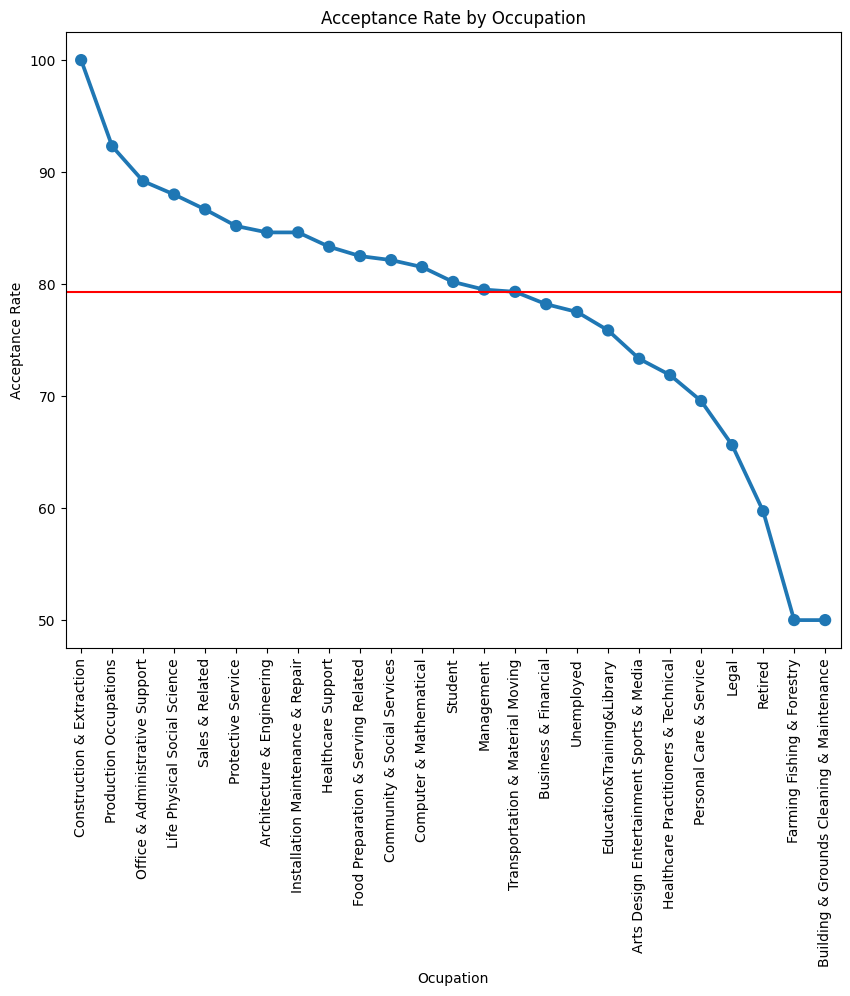

In [100]:
# Plot Acceptance Rate Heatmap - By Occupation
plt.figure(figsize=(10, 8))
sns.pointplot(df_no_urgent_place_restaurant_20_grouped, x='occupation', y='acceptance_rate')


# Add labels and title
plt.xlabel('Ocupation')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Occupation')

#
plt.axhline(79.25, color='red')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

***Acceptance rate for Restaurant(<20) coupon and Destination is No Urgent Place by occupation***

##### High Acceptance Rates (Above 80%):
Occupations such as "Construction & Extraction," "Production Occupations," "Office & Administrative Support," and "Life Physical Social Science" all have acceptance rates exceeding 80%. "Construction & Extraction" has a perfect acceptance rate of 100%, while others are also quite high.

##### Moderate to High Acceptance Rates (Between 70% and 80%):
Many occupations fall into this category, including "Sales & Related," "Protective Service," "Architecture & Engineering," "Installation Maintenance & Repair," "Healthcare Support," and "Food Preparation & Serving Related." These occupations have acceptance rates ranging from 70% to just above 80%.

##### Moderate Acceptance Rates (Between 60% and 70%):
"Community & Social Services," "Computer & Mathematical," "Student," and "Management" have acceptance rates in the range of 69.56% to 81.52%. While some are on the higher side of this range, others are closer to the 70% mark.

##### Low to Moderate Acceptance Rates (Below 60%):
Occupations like "Transportation & Material Moving," "Business & Financial," "Unemployed," "Education & Training & Library," and "Arts Design Entertainment Sports & Media" fall into this category, with acceptance rates between 50% and 79.51%.

##### Low Acceptance Rates (Below 50%):
Occupations such as "Healthcare Practitioners & Technical," "Personal Care & Service," "Legal," "Retired," "Farming Fishing & Forestry," and "Building & Grounds Cleaning & Maintenance" have acceptance rates below 70%, with some even below 60% and 50%.

Overall, there is a wide range of acceptance rates across different occupations, with some having very high acceptance rates while others have lower ones. The average acceptance rate across all occupations is stated as 79.25%. Understanding these variations in acceptance rates can be valuable for targeted marketing and outreach strategies tailored to specific occupational groups.